# MiniProjet 4: Le pendule

Dans ce projet on étudiera la résolution numérique des équations du mouvement (écuations différentielles) d'un pendule simple. On se placera dans différentes situations physiquesqui modifieron l'équation différentielle du mouvement.

## Approximation des petits angles

On cherche tout d'abord à résoudre l'équation du mouvement libre d'un pendule simple (avec approximation des petits angles) pour différents valeurs d'amortissement $q$.

Dans ce cas on pour équation du mouvement une équation différentielle linéaire du 2nd ordre :  

$$
\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

On essayera de la résoudre par la méthode RK4. Cependant, on ne peut pas faire ce calcul directement sur une équation différentielle de 2nd ordre.

Tout d'abord, on charchera à effectuer un changement de variables pour obtenir, à partir de l'équation de 2nd ordre, deux équations différentielles d'ordre 1 qu'on puisse ressoudre avec cette méthode.

**Changement de variables:**    $\begin{cases}  u_{0} = \theta \\ u_{1} = \frac{d\theta}{dt} \\ \end{cases}$

On obtient duex équations  diférentielles de 1er ordre qu'on va resoudre avec la méthode RK4:

$$
\begin{cases}  
\frac{d u_{1}}{dt} = - q \cdot u_{1} - \Omega^{2} \cdot u_{0}\\
\frac{d u_{0}}{dt} = u_{1}  
\end{cases}
$$


In [1]:
# Import des modules
import numpy as np
import matplotlib.pyplot as plt

#### Données et paramètres

In [2]:
# Constantes et paramètres
omega = 1   # en rad/s
ordre = 2   # Ordre de l'équation différentielle du mouvement

In [3]:
# Conditions initiales
tetha_0  = 10.0 *(np.pi / 180) # en radians
dtheta_0 = 0.0  # en rad/s

In [4]:
# Paramètres pour l'intervalle de temps
start = 0    # en s 
end   = 20   # en s 
step   = 0.05 # en s 

# Création du tableau temps
interval = end - start                     # Intervalle
num_points = int(interval / step) + 1      # Nombre d'éléments
t = np.linspace(start, end, num_points)    # Tableau temps t

In [5]:
# Valeurs d'amortissement 
q = [1,2,5] # en s**-1

#### Fonction dérivée

In [6]:
# EDO
def derivee_u (u, t, q):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, - q*u1 -omega**2 * u0)
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    
    # Dérivée
    du[0] = u[1]
    du[1] = - q * u[1]- omega ** 2 * u[0]

    return du

#### Fonction RK4

In [7]:
# Méthode rk4
def rk4(start, end, step, v_ini, derivee, ordre, q, F_e = 0):
    '''
        Application de la méthode rk4
    '''
    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i], q)
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2, q)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2, q)
        d4 = derivee(v[:, i] + step * d3, t[i] + step, q)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
        
    # Argument de sortie
    return v

#### Résolution

A l'aide des fonctions définies précédemment, on calcule $u_{0} = \theta(t)$ et $u_{1} = \frac{d\theta}{dt}(t)$

In [8]:
# Conditions initiales
u_ini = np.array([tetha_0, dtheta_0])

u = np.ones((3,2,401))
# Résolution par méthode rk4
for i in range(len(q)):
    urk4 = rk4(start, end, step, u_ini, derivee_u, ordre, q[i])
    u[i] = urk4

#print(u.shape)

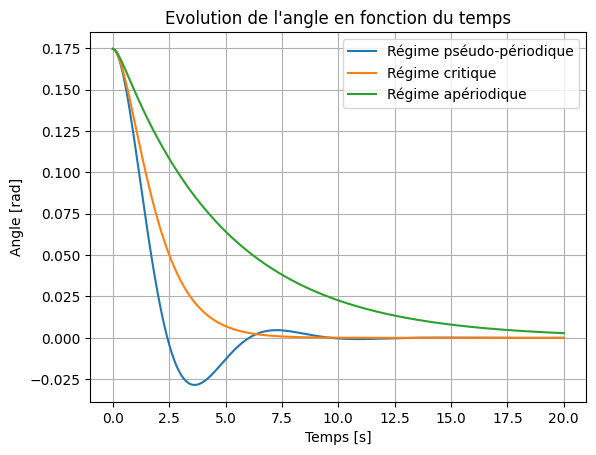

In [9]:
# Plot de l'angle en fonction du temps
labels = ["Régime pséudo-périodique", "Régime critique","Régime apériodique"]
for i in range(len(q)):
    plt.plot(t, u[i,0, :], label = labels[i])
    
plt.title("Evolution de l'angle en fonction du temps")
plt.xlabel('Temps [s]')
plt.ylabel('Angle [rad]')
plt.grid()
plt.legend()
plt.show()

## Force d'excitation

Dans ce cas on ajoute une force d'excitation externe s'exerçant sur le pendule, ce qui modifie notre équation différentielle à un une éq diff linéaire d'ordre 2 avec second membre non constant:

$$
\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta= F_{e} \cdot \sin(\Omega_{e}t)
$$

Ce qui modifie notre système d'équations du 1er ordre:

$$
\begin{cases}  
\frac{d u_{1}}{dt} = - q \cdot u_{1} - \Omega^{2} \cdot u_{0} + F_{e} \cdot \sin(\Omega_{e}t)\\
\frac{d u_{0}}{dt} = u_{1}  
\end{cases}
$$

On applique à nouveau la méthode RK4.

#### Données

On garde le tableau de temps et les conditions initiales.

In [10]:
# Constantes
F_e     = 1          # en rad/s**2
omega_e = 2*omega/3  # en rad/s

# Valeurs de q et F_e de chaque cas démqndé (libre, amorti, amorti+excitation)
cases = [(0,0),(1,0),(1,1)]

#### Fonction dérivée

Comme dans ce cas on a une équation différentielle d'ordre 2 avec second membre non constant, on modifie la foncition dérivée.

In [11]:
# EDO avec second membre non constant
def derivee_coeff (u, t, q):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, - q*u1 -omega**2 * u0 + F_e*np.sin(omega_e*t)
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    # Dérivée
    du[0] = u[1] 
    du[1] = - q * u[1]- omega ** 2 * u[0] + F_e*np.sin(omega_e*t)

    return du

#### Résolution

In [12]:
u_coeff = np.ones((3,2,401))

for i in range(len(cases)):
    # Définition des paramètres
    F_e = cases[i][1]
    q   = cases[i][0]
    # Calcul
    urk4_coeff = rk4(start, end, step, u_ini, derivee_coeff, ordre, q, F_e)
    u_coeff [i] = urk4_coeff


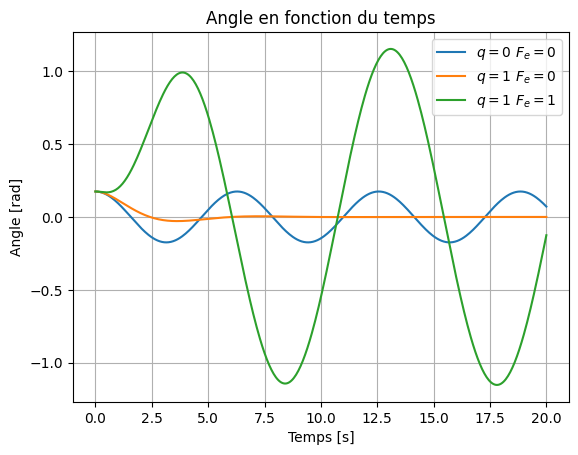

In [13]:
# Plot de l'angle en fonction du temps
labels = ["$q=0$ $F_{e}=0$", "$q=1$ $F_{e}=0$","$q=1$ $F_{e}=1$"]
for i in range(len(cases)):
    plt.plot(t, u_coeff[i,0, :], label = labels[i])
    
plt.title("Angle en fonction du temps")
plt.xlabel('Temps [s]')
plt.ylabel('Angle [rad]')
plt.grid()
plt.legend()
plt.show()

Pour chaque évolution de l'angle en fonction du temps on observe:
- Cas 1: L'allure d'un pendule simple non amorti et sans force d'excitation (on observe une allure sinusoïdale dont l'amplitude est constante dans le temps)
- Cas 2: L'allure d'un oscillateur amorti sans l'acrion d'une force d'excitation(décroissance du mouvement de façon pseudo-périodique).
- Cas 3: L'allure d'un oscillateur sous l'effet d'une force d'excitation et amorti (amplitude variable qui augmente et décroit dans le temps). L'intensité du mouvement de la bille est augmenté par lq force externe et réduit par l'amortissement.

## Mouvement chaotique

Dans ce cas on ne fait plus l'hypothèse des petits angles. On aura donc comme équation du mouvement un équation diffféerentielle d'ordre 2 avec 2nd membre non constant pas linéaire:


$$
\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin(\theta)= F_{e} \cdot \sin(\Omega_{e}t)
$$

En gardant notre changement de variable initial, le systèeme d'équations du 1er ordre sont modifiées:

$$
\begin{cases}  
\frac{d u_{1}}{dt} = - q \cdot u_{1} - \Omega^{2} \cdot \sin(u_{0}) + F_{e} \cdot \sin(\Omega_{e}t)\\
\frac{d u_{0}}{dt} = u_{1}  
\end{cases}
$$

Pour certains valeurs des paramètres on s'attend à un comportement chaotique.

#### Données

In [14]:
# Conditions initiales
tetha_0  = 10.0*(np.pi / 180) # en rad
dtheta_0 = 0.0  # en rad/s

In [15]:
#  Paramètres
q       = 0.5         # en s**-1
omega_e = 2*omega/3   # en rad/s

# Amplitudes d'excitation
F_e = [1.4, 1.44, 1.465, 1.5] # en rad/s**2

In [16]:
# Paramètres pour l'intervalle de temps
start  = 0    # en s 
end    = 100   # en s 
step   = 0.05 # en s 

# Création du tableau temps
interval = end - start                     # Intervalle
num_points = int(interval / step) + 1      # Nombre d'éléments
t = np.linspace(start, end, num_points)    # Tableau temps t

#### Fonctions

In [17]:
# EDO avec second membre non constant
def derivee_caot (u, t, q, F_e):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, - q * u[1]- omega ** 2 *np.sin(u[0]) + F_e*np.sin(omega_e*t))
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    # Dérivée
    du[0] = u[1]
    du[1] = - q * u[1]- omega ** 2 *np.sin(u[0]) + F_e*np.sin(omega_e*t)

    return du

In [18]:
# Méthode rk4
def rk4_caot(start, end, step, v_ini, derivee, ordre, q, F_e = 0):
    '''
        Application de la méthode rk4
    '''
    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i], q, F_e)
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2, q, F_e)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2, q, F_e)
        d4 = derivee(v[:, i] + step * d3, t[i] + step, q, F_e)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
        
        # On restreint l'angle theta entre -pi et pi
        if v[0, i+1] > np.pi:
            v[0, i+1] -= 2*np.pi
        elif v[0, i+1] < -np.pi:
            v[0, i+1] += 2*np.pi

    # Argument de sortie
    return v

#### Résolution

In [19]:
# Résolution de l'ED
u_caot = np.ones((4, 2, 2001))
for i in range(len(F_e)):
    urk4_caot = rk4_caot(start, end, step, u_ini, derivee_caot, ordre, q, F_e[i])
    u_caot[i] = urk4_caot

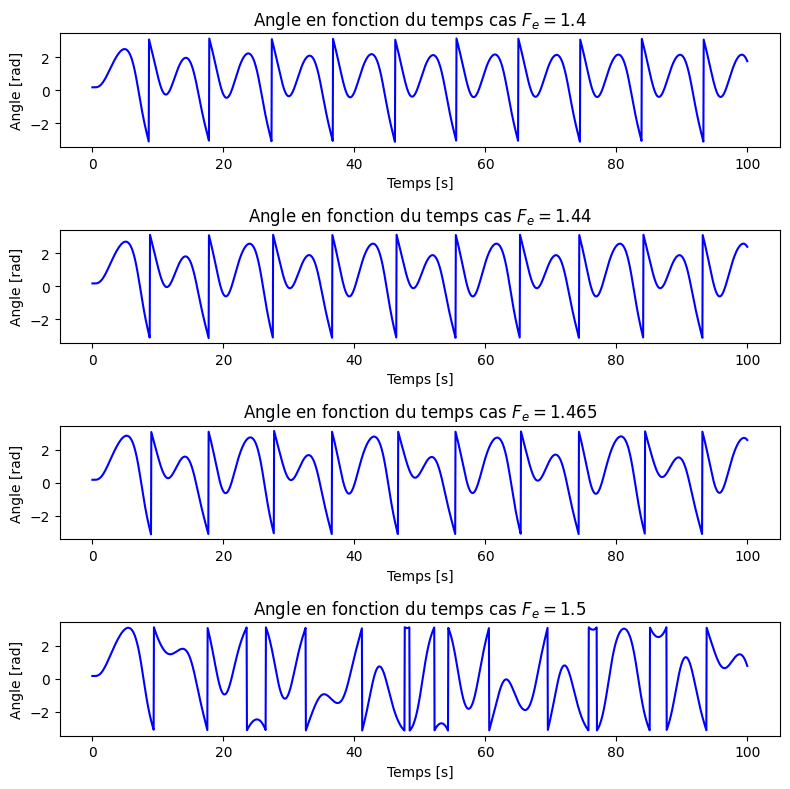

In [20]:
# Plot solutions
plt.figure(figsize=(8,8))
for i in range(len(F_e)):
    labels = "Cas"+str(i)
    plt.subplot(4,1,i+1)
    plt.plot(t, u_caot[i,0, :], label = labels, color = "blue")
    titles = "Angle en fonction du temps cas $F_{e}=$"+ str(F_e[i])
    plt.title(titles)
    plt.xlabel('Temps [s]');plt.ylabel('Angle [rad]')  

plt.tight_layout()
plt.show()

On constate que dans les trois premiers cas la fonciton maintient une forme périodique dans le temps. Cependant, dans le quatrième cas il n'y pas de répétition évidente du motif et donc on aurait envie de déduire qu'à priori (dans l'intervalle considéré) la fonction n'est pas périodique dans le temps.

#### Cas des conditions initiales similaires

In [21]:
# Conditions initiales en rad
thetas = np.array([10.0, 9.999])*(np.pi/180)

# Calcul de l'angle en fonction du temps pour les deux cas
urk4_caot_ini0 = rk4_caot(start, end, step, [thetas[0], dtheta_0], derivee_caot, ordre, q, F_e = 1.5)
urk4_caot_ini1 = rk4_caot(start, end, step, [thetas[1], dtheta_0], derivee_caot, ordre, q, F_e = 1.5)

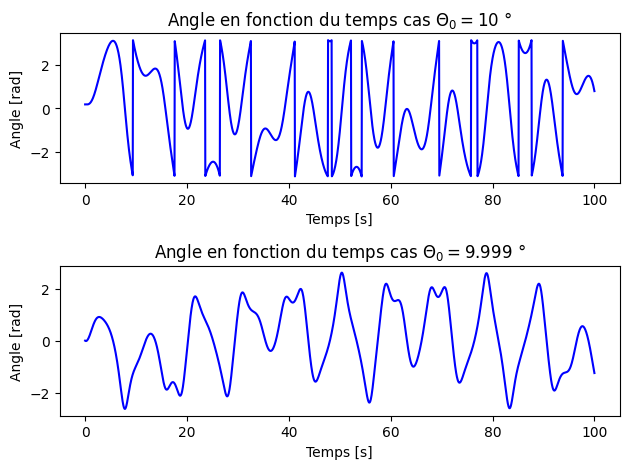

In [22]:
# Tracé de l'angle dans les deux situations
plt.subplot(2,1,1)
plt.plot(t,urk4_caot_ini0[0,:], color = "blue")
plt.title("Angle en fonction du temps cas $\Theta_{0}=10\mathrm{~°}$")
plt.xlabel('Temps [s]');plt.ylabel('Angle [rad]')  


plt.subplot(2,1,2)
plt.plot(t,urk4_caot_ini0[1,:], color = "blue")
plt.title("Angle en fonction du temps cas $\Theta_{0}=9.999\mathrm{~°}$")
plt.xlabel('Temps [s]');plt.ylabel('Angle [rad]')  


plt.tight_layout()
plt.show()

On voit bien avec cet exemple qu'une petite variation des conditions initiales dans un système chaotique peut avoir un grand impact sur le comportement de celui ci. Dans ce cas on voit une evolution de l'angle moins brusque lorsque l'angle initial est un peu plus petit.

[]

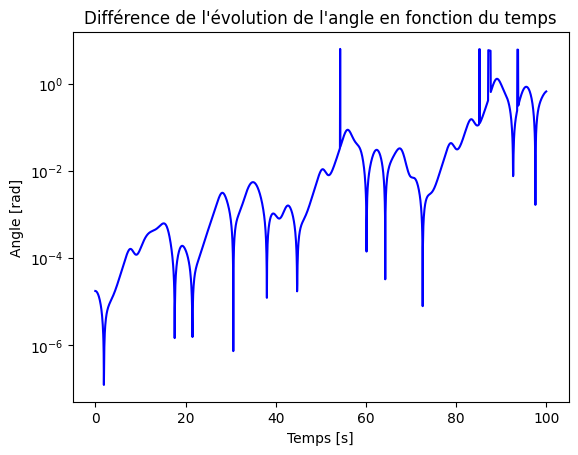

In [24]:
# Calcul de la différence entre l'évolution des deux cas
theta_diff = np.abs(urk4_caot_ini0 - urk4_caot_ini1)
plt.plot(t,theta_diff[0], color = "blue")
plt.title("Différence de l'évolution de l'angle en fonction du temps")
plt.xlabel('Temps [s]');plt.ylabel('Angle [rad]')  
plt.semilogy()

On se rend compte que la différence entre les deux diminue avec le temps.